In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparando a base a ser trabalhada

## Carregando as bases 

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral


In [71]:
# Load the datasets
df_fam = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data/df_familia_final_2.csv', sep=',', dtype={23: 'str'})

In [72]:
df_fam.head()

,cd_ibge,uf_ibge,regiao_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,...,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,dias_cadastramento,dias_atualizacao,classe_renda
0,2708501,27,2,2,3,2297048,40.0,1.0,1.0,5.0,...,1.0,2.0,2.0,2.0,0.0,3,550128323898416,2478.0,382,0.0
1,2516607,25,2,1,3,697587,937.0,2.0,1.0,6.0,...,1.0,3.0,2.0,2.0,0.0,1,550245146328323,483.0,483,2.0
2,2312908,23,2,2,3,3807697,66.0,1.0,1.0,4.0,...,1.0,2.0,2.0,2.0,0.0,3,550245146328323,1118.0,144,0.0
3,2911709,29,2,2,3,3322305,636.0,1.0,1.0,4.0,...,1.0,1.0,2.0,2.0,0.0,3,550295410213721,242.0,238,2.0
4,3168705,31,3,2,2,1891054,200.0,1.0,1.0,3.0,...,1.0,1.0,2.0,2.0,0.0,3,550245146328323,279.0,279,1.0


In [73]:
# Load the datasets
df_pessoas = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data/df_pessoas_final_2.csv', sep=',', dtype={4: 'str'})

In [74]:
df_pessoas.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
0,2297048,5080082,2,24,1,4.0,2.0,1,2,1.0,...,5.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563253083138481,0.0
1,2297048,6871939,2,5,3,4.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563253083138481,0.0
2,2297048,12839729,1,2,3,4.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563253083138481,0.0
3,697587,4991136,1,84,1,4.0,1.0,1,2,2.0,...,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563276925444753,2.0
4,3807697,1628136,2,24,1,4.0,2.0,1,2,1.0,...,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563276393161791,0.0


In [75]:
# Load the datasets
df_fam_pessoas = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data/df_familia_pessoa_final_2.csv', sep=',', dtype={4: 'str'})

In [76]:
df_fam_pessoas.head()

,cd_ibge,uf_ibge,regiao_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,...,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes
0,2708501,27,2,2,3,2297048,40.0,1.0,1.0,5.0,...,5.0,5.0,2.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563253083138481
1,2708501,27,2,2,3,2297048,40.0,1.0,1.0,5.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563253083138481
2,2708501,27,2,2,3,2297048,40.0,1.0,1.0,5.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563253083138481
3,2516607,25,2,1,3,697587,937.0,2.0,1.0,6.0,...,-1.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563276925444753
4,2312908,23,2,2,3,3807697,66.0,1.0,1.0,4.0,...,-1.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563276393161791


In [77]:
# Load the datasets
ideb_2017 = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Analises_Risla/ideb_municipio_publica_2017.csv', sep=',', dtype={4: 'str'})

In [78]:
ideb_2017.head()

,Código do Município,ideb_2017_municipio
0,1100015,6.2
1,1100023,5.5
2,1100031,6.1
3,1100049,6.3
4,1100056,6.4


## Fazendo um pipeline para criar as novas features

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd

# Função para transformar o DataFrame
def extract_rf_features(df):
    # Converter a coluna 'cod_parentesco_rf_pessoa' para inteiro
    df['cod_parentesco_rf_pessoa'] = df['cod_parentesco_rf_pessoa'].astype('int64')
    
    # Filtrar as pessoas que são responsáveis familiares
    df_rf = df[df['cod_parentesco_rf_pessoa'] == 1].copy()
    
    if df_rf.empty:
        print("Aviso: Não há responsáveis familiares após o filtro.")
        return pd.DataFrame()  # Retorna um DataFrame vazio se não houver dados

    # Agrupar pelo 'id_familia' e criar as novas colunas com base nas variáveis selecionadas
    df_rf = df_rf.groupby('id_familia').agg(
        rf_idade=('idade', 'max'),
        rf_trab_principal=('cod_principal_trab_memb', 'max'),
        rf_com_deficiencia=('cod_deficiencia_memb', 'max'),
        rf_trab_agricultura=('cod_agricultura_trab_memb', 'max'),
        rf_sexo=('cod_sexo_pessoa', 'max'),
        rf_curso_frequentou=('cod_curso_frequentou_pessoa_memb', 'max'),
        rf_curso_frequenta=('cod_curso_frequenta_memb', 'max'),
        rf_trabalhou_semana=('cod_trabalhou_memb', 'max'),
        rf_cor_raca=('cod_raca_cor_pessoa', 'max'),
        rf_concluiu_curso=('cod_concluiu_frequentou_memb', 'max')
    ).reset_index()
    
    return df_rf

# Criar um FunctionTransformer com a função definida
extract_rf_transformer = FunctionTransformer(extract_rf_features)

# Criar o pipeline com a etapa 'features_rf'
pipeline_rf = Pipeline(steps=[
    ('features_rf', extract_rf_transformer)
])

# DataFrame original
df_rf = pipeline_rf.fit_transform(df_pessoas)

# Verificar se o DataFrame transformado contém dados
df_rf.head()

,id_familia,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso
0,13,23,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,1.0
1,190,31,4.0,2,2.0,2,8.0,-1.0,1.0,4.0,1.0
2,205,65,-1.0,1,-1.0,2,13.0,-1.0,2.0,1.0,-1.0
3,259,31,4.0,2,2.0,2,5.0,-1.0,1.0,4.0,2.0
4,267,35,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0


In [80]:
# Função para calcular as porcentagens de trabalho
def extract_trabalho_features(df):
    # Agrupar pelo 'id_familia' e calcular as porcentagens com base nas variáveis selecionadas
    df_trabalho = df.groupby('id_familia').apply(
        lambda x: pd.Series({
            'pct_extrativista': ((x['cod_agricultura_trab_memb'] == 1) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_conta_propria': ((x['cod_principal_trab_memb'] == 1) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_trab_rural_temporario': ((x['cod_principal_trab_memb'] == 2) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_empregado_sem_carteira': ((x['cod_principal_trab_memb'] == 3) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_empregado_com_carteira': ((x['cod_principal_trab_memb'] == 4) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_trab_domestico_sem_carteira': ((x['cod_principal_trab_memb'] == 5) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_militar_servidor': ((x['cod_principal_trab_memb'] == 8) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_trabalho_12meses_adulto': ((x['cod_trabalho_12_meses_memb'] == 1) & (x['idade'] >= 18) & (x['idade'] <= 59)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_trabalho_12meses_idoso': ((x['cod_trabalho_12_meses_memb'] == 1) & (x['idade'] >= 60)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_trabalho_12meses_crianca': ((x['cod_trabalho_12_meses_memb'] == 1) & (x['idade'] < 18)).sum() / x['qtde_pessoas'].iloc[0],
        })
    ).reset_index()
    
    return df_trabalho

# Criar um FunctionTransformer com a função definida
extract_trabalho_transformer = FunctionTransformer(extract_trabalho_features)

# Criar o pipeline com a etapa 'features_trabalho'
pipeline_trabalho = Pipeline(steps=[
    ('features_trabalho', extract_trabalho_transformer)
])

# DataFrame original
df_trabalho = pipeline_trabalho.fit_transform(df_fam_pessoas)

# Verificar se o DataFrame transformado contém dados
df_trabalho.head()

,id_familia,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca
0,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,190,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,0.0
2,205,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,259,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.250000,0.0,0.0
4,267,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.166667,0.0,0.0


In [81]:
# Função para extrair as features de escolaridade
def extract_escola_features(df):
    # Agrupar pelo 'id_familia' e calcular as porcentagens relacionadas à escolaridade
    df_escola = df.groupby('id_familia').apply(
        lambda x: pd.Series({
            'pct_nao_alfabetizados': ((x['cod_sabe_ler_escrever_memb'] == 2) & (x['idade'] >= 10)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_n_freq_escola': ((x['ind_frequenta_escola_memb'] == 3) & (x['idade'] >= 4) & (x['idade'] <= 17)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_freq_publica': ((x['ind_frequenta_escola_memb'] == 1) & (x['idade'] >= 4) & (x['idade'] <= 17)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_freq_particular': ((x['ind_frequenta_escola_memb'] == 2) & (x['idade'] >= 4) & (x['idade'] <= 17)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_adulto_nunca_freq_escola': ((x['ind_frequenta_escola_memb'] == 4) & (x['idade'] >= 18)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_escolar_nunca_freq_escola': ((x['ind_frequenta_escola_memb'] == 4) & (x['idade'] >= 4) & (x['idade'] <= 17)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_freq_creche': ((x['cod_curso_frequenta_memb'] == 1) & (x['idade'] < 4)).sum() / x['qtde_pessoas'].iloc[0],
        })
    ).reset_index()
    
    return df_escola

# Criar um FunctionTransformer com a função definida
extract_escola_transformer = FunctionTransformer(extract_escola_features)

# Criar o pipeline com a etapa 'features_escola'
pipeline_escola = Pipeline(steps=[
    ('features_escola', extract_escola_transformer)
])

# DataFrame original
df_escola = pipeline_escola.fit_transform(df_fam_pessoas)

# Verificar se o DataFrame transformado contém dados
df_escola.head()

,id_familia,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche
0,13,0.2,0.0,0.20,0.0,0.0,0.0,0.0
1,190,0.0,0.0,0.50,0.0,0.0,0.0,0.0
2,205,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,259,0.0,0.0,0.75,0.0,0.0,0.0,0.0
4,267,0.0,0.0,0.50,0.0,0.0,0.0,0.0


In [82]:
# Função para verificar a existência da característica
def verifica_caracteristica(x, condicao):
    return 1 if condicao.any() else 0

# Função para extrair as features de composição
def extract_composicao_features(df):
    df_composicao = df.groupby('id_familia').apply(
        lambda x: pd.Series({
            'pct_idosos': (x['idade'] >= 60).sum() / x['qtde_pessoas'].iloc[0],
            'pct_deficientes': (x['cod_deficiencia_memb'] == 1).sum() / x['qtde_pessoas'].iloc[0],
            'pct_1_infancia': (x['idade'] <= 6).sum() / x['qtde_pessoas'].iloc[0],
            'pct_adulto': ((x['idade'] >= 18) & (x['idade'] < 60)).sum() / x['qtde_pessoas'].iloc[0],
            'pct_crianca_adolescente': ((x['idade'] > 6) & (x['idade'] <= 17)).sum() / x['qtde_pessoas'].iloc[0],
            'fam_gpte': verifica_caracteristica(x, (x['ind_parc_mds_fam'] != 0) | 
                                                 (x['cod_familia_indigena_fam'] == 1) | 
                                                 (x['ind_familia_quilombola_fam'] == 1))
        })
    ).reset_index()
    
    return df_composicao

# Criar um FunctionTransformer com a função definida
extract_composicao_transformer = FunctionTransformer(extract_composicao_features)

# Criar o pipeline com a etapa 'features_composicao'
pipeline_composicao = Pipeline(steps=[
    ('features_composicao', extract_composicao_transformer)
])

# DataFrame original
df_composicao = pipeline_composicao.fit_transform(df_fam_pessoas)

# Verificar se o DataFrame transformado contém dados
df_composicao.head()

,id_familia,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte
0,13,0.0,0.0,0.400000,0.400000,0.20,0.0
1,190,0.0,0.0,0.000000,0.500000,0.50,0.0
2,205,1.0,1.0,0.000000,0.000000,0.00,0.0
3,259,0.0,0.0,0.000000,0.250000,0.75,0.0
4,267,0.0,0.0,0.166667,0.333333,0.50,0.0


In [83]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Criar um transformador personalizado
class FeaturesIdebTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ideb_data):
        self.ideb_data = ideb_data

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Realizar o merge com a base de dados do IDEB
        df_fam_ideb = X.merge(
            self.ideb_data,
            left_on='cd_ibge',
            right_on='Código do Município',
            how='left'
        )
        
        # Remover a coluna 'Código do Município'
        df_fam_ideb = df_fam_ideb.drop('Código do Município', axis=1)

        # Preencher os valores ausentes de 'ideb_2017_municipio' com -1
        df_fam_ideb['ideb_2017_municipio'].fillna(-1, inplace=True)
        
        # Selecionar apenas as colunas desejadas
        df_fam_ideb = df_fam_ideb[['id_familia', 'ideb_2017_municipio']]
        
        return df_fam_ideb

# Criar o pipeline
pipeline_ideb = Pipeline(steps=[
    ('features_ideb', FeaturesIdebTransformer(ideb_2017))
])

# Aplicar o pipeline ao DataFrame df_fam
df_ideb = pipeline_ideb.fit_transform(df_fam)

# Visualizar o resultado
print(df_ideb.head())

   id_familia  ideb_2017_municipio
0     2297048                  4.6
1      697587                  5.5
2     3807697                  9.1
3     3322305                  4.9
4     1891054                  6.7


In [84]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

class FeaturesDomicilioTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Remover as colunas indesejadas do DataFrame
        return X.drop(columns=[
            'regiao_ibge', 'estrato', 'vlr_renda_media_fam',
            'cod_especie_domic_fam', 'qtd_comodos_dormitorio_fam',
            'cod_material_domic_fam', 'cod_agua_canalizada_fam',
            'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
            'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
            'cod_calcamento_domic_fam', 'peso.fam'
        ])

# Criar o pipeline
pipeline_domicilio = Pipeline([
    ('features_transformer', FeaturesDomicilioTransformer())
])

# Supondo que df_fam já tenha sido carregado anteriormente
# Aplicar o pipeline ao DataFrame df_fam
df_domicilio = pipeline_domicilio.fit_transform(df_fam)

# Exibir as primeiras linhas do novo DataFrame df_domicilio
df_domicilio.head()

,cd_ibge,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,2708501,27,3,2297048,1.0,5.0,2.0,1.0,2.0,2.0,0.0,3,2478.0,382,0.0
1,2516607,25,3,697587,2.0,6.0,2.0,1.0,2.0,2.0,0.0,1,483.0,483,2.0
2,2312908,23,3,3807697,1.0,4.0,5.0,1.0,2.0,2.0,0.0,3,1118.0,144,0.0
3,2911709,29,3,3322305,1.0,4.0,5.0,1.0,2.0,2.0,0.0,3,242.0,238,2.0
4,3168705,31,2,1891054,1.0,3.0,2.0,1.0,2.0,2.0,0.0,3,279.0,279,1.0


In [85]:
import pandas as pd

# DataFrames dos pipelines sejam:
# df_rf, df_trabalho, df_escola, df_composicao, df_ideb, df_domicilio

# Realizar merge dos DataFrames
# Primeiro, iniciamos com df_rf
df_modelo = df_rf

# Merge com df_trabalho
df_modelo = df_modelo.merge(df_trabalho, on='id_familia', how='left')

# Merge com df_escola
df_modelo = df_modelo.merge(df_escola, on='id_familia', how='left')

# Merge com df_composicao
df_modelo = df_modelo.merge(df_composicao, on='id_familia', how='left')

# Merge com df_ideb
df_modelo = df_modelo.merge(df_ideb, on='id_familia', how='left')

# Merge com df_domicilio
df_modelo = df_modelo.merge(df_domicilio, on='id_familia', how='left')

# Remover duplicatas, se houver
df_modelo = df_modelo.drop_duplicates(subset=['id_familia'])

# Resetar o índice, se necessário
df_modelo.reset_index(drop=True, inplace=True)

# Verificar se o DataFrame final contém dados
df_modelo.head()


,id_familia,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,...,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,13,23,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,...,2.0,2.0,1.0,2.0,2.0,0.0,5,1127.0,514,0.0
1,190,31,4.0,2,2.0,2,8.0,-1.0,1.0,4.0,...,5.0,5.0,1.0,2.0,2.0,0.0,2,315.0,315,1.0
2,205,65,-1.0,1,-1.0,2,13.0,-1.0,2.0,1.0,...,4.0,5.0,1.0,2.0,2.0,0.0,1,452.0,452,0.0
3,259,31,4.0,2,2.0,2,5.0,-1.0,1.0,4.0,...,5.0,5.0,1.0,2.0,2.0,0.0,4,3566.0,474,1.0
4,267,35,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,...,5.0,2.0,1.0,2.0,2.0,0.0,6,1754.0,416,0.0


In [86]:
df_modelo.shape

(96514, 49)

In [87]:
df_modelo.columns

Index(['id_familia', 'rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'cd_ibge',
       'uf_ibge', 'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', '

In [88]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96514 entries, 0 to 96513
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_familia                       96514 non-null  int64  
 1   rf_idade                         96514 non-null  int64  
 2   rf_trab_principal                96514 non-null  float64
 3   rf_com_deficiencia               96514 non-null  int64  
 4   rf_trab_agricultura              96514 non-null  float64
 5   rf_sexo                          96514 non-null  int64  
 6   rf_curso_frequentou              96514 non-null  float64
 7   rf_curso_frequenta               96514 non-null  float64
 8   rf_trabalhou_semana              96514 non-null  float64
 9   rf_cor_raca                      96514 non-null  float64
 10  rf_concluiu_curso                96514 non-null  float64
 11  pct_extrativista                 96514 non-null  float64
 12  pct_conta_propria 

In [89]:
# Supondo que df_modelo já esteja definido
df_modelo['classe_renda'] = df_modelo['classe_renda'].astype('int64')

# Verificar o tipo da coluna após a conversão
print(df_modelo['classe_renda'].dtype)


int64


In [90]:
df_modelo = df_modelo.drop(columns=['cd_ibge'])

In [91]:
df_modelo.isnull().sum().sum()

0

In [92]:
df_modelo.head()

,id_familia,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,...,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,13,23,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,...,2.0,2.0,1.0,2.0,2.0,0.0,5,1127.0,514,0
1,190,31,4.0,2,2.0,2,8.0,-1.0,1.0,4.0,...,5.0,5.0,1.0,2.0,2.0,0.0,2,315.0,315,1
2,205,65,-1.0,1,-1.0,2,13.0,-1.0,2.0,1.0,...,4.0,5.0,1.0,2.0,2.0,0.0,1,452.0,452,0
3,259,31,4.0,2,2.0,2,5.0,-1.0,1.0,4.0,...,5.0,5.0,1.0,2.0,2.0,0.0,4,3566.0,474,1
4,267,35,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,...,5.0,2.0,1.0,2.0,2.0,0.0,6,1754.0,416,0


In [93]:
df_modelo.shape

(96514, 48)

In [94]:
df_modelo.columns

Index(['id_familia', 'rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_ilumina

## Criando uma função de processamento OneHotEncoder

In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda', encoder=None):
    # Definir colunas categóricas e numéricas
    binary_cols = ['cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte']  
    multiclass_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam','rf_curso_frequentou','rf_curso_frequenta',
                      'rf_cor_raca', 'rf_concluiu_curso'] 
    numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio',  'rf_idade'] 
    percentage_cols = ['pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos','pct_deficientes',
       'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente']  
    
                         
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder, considerando os valores -1 como uma categoria válida
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df

In [96]:
# Chamando a função
df_modelo = preprocess_data(df_modelo)
df_modelo.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,rf_idade,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,13,2.0,5,1127.0,514,5.3,23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,190,5.0,2,315.0,315,5.6,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,205,4.0,1,452.0,452,5.6,65,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,259,5.0,4,3566.0,474,5.6,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,267,5.0,6,1754.0,416,5.6,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


## Criando uma função para normalização as colunas quantitativas

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o StandardScaler para normalização
    scaler = StandardScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso do script
numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio',  'rf_idade']

In [98]:
# Chamando a função
df_modelo = normalize_numerical_columns(df_modelo, numerical_cols)
df_modelo.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,rf_idade,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,13,-1.222245,1.673721,-0.642167,0.311564,-0.118844,-1.178110,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,190,0.476664,-0.453209,-1.049083,-0.315316,0.189702,-0.671407,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,205,-0.089639,-1.162186,-0.980429,0.116255,0.189702,1.482082,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,259,0.476664,0.964744,0.580087,0.185558,0.189702,-0.671407,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,267,0.476664,2.382697,-0.327959,0.002849,0.189702,-0.418056,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [99]:
# Salvar o DataFrame final em um arquivo, se necessário
#df_modelo_final.to_csv('Data_modelo/df_modelo_final.csv', index=False)

In [100]:
# Exibir todas as colunas do DataFrame final
print(df_modelo.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'rf_idade', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33'

In [117]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_modelo[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'rf_idade', 'pct_extrativista', 'pct_conta_propria',
               'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
               'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche',
               'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2',
               'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 
               'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 
               'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classf_2', 'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0',
               'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0', 'cod_material_piso_fam_4.0', 'cod_material_piso_fam_5.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0',
               'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0', 'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0',
               'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0', 'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0',
               'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0', 'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0',
               'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0', 'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_1.0', 'rf_curso_frequenta_3.0',
               'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0',
               'rf_curso_frequenta_11.0', 'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0',
               'rf_cor_raca_5.0', 'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0']]
y = df_modelo['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96514, 108)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,rf_idade,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0
0,-1.222245,1.673721,-0.642167,0.311564,-0.118844,-1.178110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.476664,-0.453209,-1.049083,-0.315316,0.189702,-0.671407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.089639,-1.162186,-0.980429,0.116255,0.189702,1.482082,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.476664,0.964744,0.580087,0.185558,0.189702,-0.671407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.476664,2.382697,-0.327959,0.002849,0.189702,-0.418056,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [118]:
# Exibir todas as colunas do DataFrame X
print(X.columns.tolist())

['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'rf_idade', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35'

Colunas_modelo = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'rf_idade', 'pct_extrativista', 'pct_conta_propria',
                         'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
                         'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
                         'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente',
                         'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14',
                         'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29',
                         'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classf_2',
                         'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0',
                         'cod_material_piso_fam_4.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0', 'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0',
                         'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0',
                         'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0',
                         'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0',
                         'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_1.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0',
                         'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0',
                         'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_concluiu_curso_1.0',
                         'rf_concluiu_curso_2.0']

In [119]:
import pandas as pd

# Deixando no df X apenas as colunas usadas no modelo

# Lista de colunas que devem ser mantidas
colunas_modelo = [
    'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao',
    'ideb_2017_municipio', 'rf_idade', 'pct_extrativista', 'pct_conta_propria',
    'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
    'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
    'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
    'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola',
    'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
    'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0',
    'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13',
    'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22',
    'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28',
    'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41',
    'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53',
    'classf_2', 'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0',
    'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0',
    'cod_material_piso_fam_4.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0',
    'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0', 'cod_iluminacao_domic_fam_3.0',
    'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0',
    'rf_curso_frequentou_1.0', 'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0',
    'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0',
    'rf_curso_frequentou_7.0', 'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0',
    'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0',
    'rf_curso_frequentou_13.0', 'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0',
    'rf_curso_frequenta_1.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0',
    'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0',
    'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0',
    'rf_curso_frequenta_11.0', 'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0',
    'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0',
    'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0'
]

# Mantém apenas as colunas que estão na lista de colunas_modelo
X = X[colunas_modelo]


In [120]:
X.head()

,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,rf_idade,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_10.0,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0
0,-1.222245,1.673721,-0.642167,0.311564,-0.118844,-1.178110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.476664,-0.453209,-1.049083,-0.315316,0.189702,-0.671407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.089639,-1.162186,-0.980429,0.116255,0.189702,1.482082,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.476664,0.964744,0.580087,0.185558,0.189702,-0.671407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.476664,2.382697,-0.327959,0.002849,0.189702,-0.418056,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [121]:
X.shape

(96514, 106)

In [122]:
y.shape

(96514,)

In [123]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 96514 entries, 0 to 96513
Series name: classe_renda
Non-Null Count  Dtype
--------------  -----
96514 non-null  int64
dtypes: int64(1)
memory usage: 754.1 KB


In [124]:
# Verificar formas
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Verificar índices
print("Indices of X:", X.index)
print("Indices of y:", y.index)


Shape of X: (96514, 106)
Shape of y: (96514,)
Indices of X: RangeIndex(start=0, stop=96514, step=1)
Indices of y: RangeIndex(start=0, stop=96514, step=1)


In [130]:
print(type(y))
print(y.head())  # Veja os primeiros registros para verificar o que está lá

<class 'pandas.core.series.Series'>
0    0
1    1
2    0
3    1
4    0
Name: classe_renda, dtype: int64


# Aplicando o modelo na amostra_2

In [125]:
from catboost import CatBoostClassifier

In [126]:
import joblib

# Carregar o modelo a partir de um arquivo
model = joblib.load('CatBoostClassifier.pkl')


In [127]:
# Agora você pode fazer previsões
predictions = model.predict(X)

In [128]:
print(predictions)

[[0]
 [2]
 [2]
 ...
 [0]
 [0]
 [0]]


Type of predictions: <class 'numpy.ndarray'>
Shape of predictions: (96514,)
First few predictions: [0 2 2 1 0]
   real  predictions
0     0            0
1     1            2
2     0            2
3     1            1
4     0            0


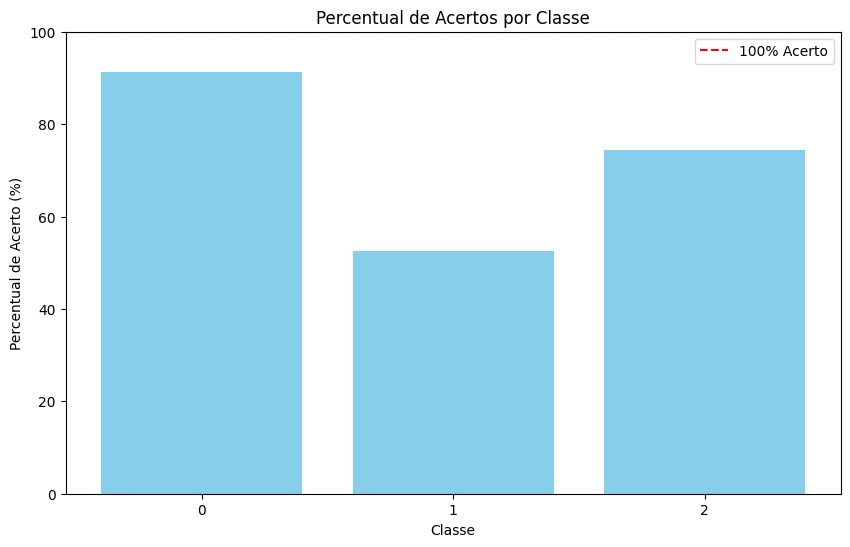

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Verifique a estrutura de predictions
print("Type of predictions:", type(predictions))
print("Shape of predictions:", predictions.shape if hasattr(predictions, 'shape') else 'Not a numpy array')
print("First few predictions:", predictions[:5])

# Se predictions for uma matriz 2D, aplique flatten ou escolha a coluna certa
if hasattr(predictions, 'shape') and len(predictions.shape) > 1:
    predictions = predictions.flatten()  # Transforma em 1D

# Criar um DataFrame para comparação
comparison_df = pd.DataFrame({
    'real': y.values,            # Usando os valores da Series y
    'predictions': predictions    # Supondo que predictions agora é unidimensional
})

# Exibir as primeiras linhas do DataFrame de comparação
print(comparison_df.head())

# Calcular percentual de acertos para cada classe
accuracy_per_class = comparison_df.groupby('real').apply(lambda x: (x['predictions'] == x['real']).mean())

# Renomear o índice para facilitar a visualização
accuracy_per_class = accuracy_per_class.rename_axis('Classe').reset_index(name='Percentual de Acerto')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(accuracy_per_class['Classe'].astype(str), accuracy_per_class['Percentual de Acerto'] * 100, color='skyblue')
plt.title("Percentual de Acertos por Classe")
plt.xlabel("Classe")
plt.ylabel("Percentual de Acerto (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Limitar o eixo y a 100%
plt.axhline(y=100, color='r', linestyle='--', label='100% Acerto')
plt.legend()
plt.show()



Type of predictions: <class 'numpy.ndarray'>
Shape of predictions: (96514,)
First few predictions: [0 2 2 1 0]
   real  predictions
0     0            0
1     1            2
2     0            2
3     1            1
4     0            0


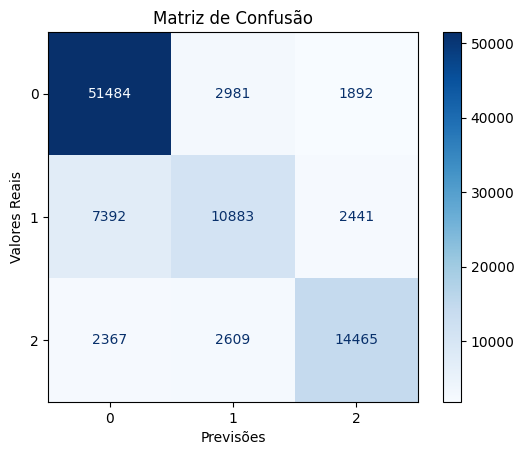

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Verifique a estrutura de predictions
print("Type of predictions:", type(predictions))
print("Shape of predictions:", predictions.shape if hasattr(predictions, 'shape') else 'Not a numpy array')
print("First few predictions:", predictions[:5])

# Se predictions for uma matriz 2D, aplique flatten ou escolha a coluna certa
if hasattr(predictions, 'shape') and len(predictions.shape) > 1:
    predictions = predictions.flatten()  # Transforma em 1D

# Criar um DataFrame para comparação
comparison_df = pd.DataFrame({
    'real': y.values,            # Usando os valores da Series y
    'predictions': predictions    # Supondo que predictions agora é unidimensional
})

# Exibir as primeiras linhas do DataFrame de comparação
print(comparison_df.head())

# Gerar a matriz de confusão
cm = confusion_matrix(comparison_df['real'], comparison_df['predictions'])

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(comparison_df['real']))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()